**Mounting colab notebook to Drive**

In [ ]:
# Mounting colab notebook to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


*Installing AI-Feynman and relevant packages*

In [ ]:
# Checking OS version, fortran compiler version, and granting relevant permissions (github only)
!sudo apt-get install csh
!lsb_release -a
!gfortran --version
!chmod +777 '/content/drive/My Drive/Symbolic-Regressor/Feynman Local/'*

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
csh is already the newest version (20110502-7).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.3 LTS
Release:	22.04
Codename:	jammy
GNU Fortran (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# Installing AI Feynman 2.0, c shell, and relevant packages
## https://ai-feynman.readthedocs.io/en/latest/
!pip install aifeynman --no-deps
!pip install sortedcontainers scikit-learn torch seaborn torchvision openpyxl

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
# Importing relevant modules
import os
import time
import random
import numpy as np
import matplotlib as plt
import pandas as pd
import aifeynman

# Configuring matplotlib preferences
%matplotlib inline
plt.style.use('seaborn-whitegrid')

*Verifying working directory and data file name*

In [ ]:
input_path = '/content/drive/My Drive/Symbolic-Regressor/Feynman Local/benchmark/'
os.chdir(input_path)
!pwd
data_path = '/content/drive/My Drive/Symbolic-Regressor/Feynman Local/benchmark/tegmark_data/'
data_file = 'I_44_4.txt' #enter name of data text file should end in .txt

/content/drive/My Drive/Symbolic-Regressor/Feynman Local/benchmark


*Shortening to 10,000 data points*

In [ ]:
os.chdir(data_path)
with open(data_file, "r") as file:
    f = open('I_44_4_short.txt', 'w') # MANUALLY enter name of data file + "_short", file created for you in directory
    for i in range(10000):
        line = file.readline()
        f.write(line)
    f.close()

feynman_data = 'I_44_4_short.txt'

*Plotting selected variables of data (optional) and running symbolic regression with time measurements*

             0         1         2         3         4          5   6
0     4.420473  3.845858  1.946024  3.630354  3.764595   1.201266 NaN
1     4.670882  2.583822  2.037491  3.855706  1.721105 -19.833936 NaN
2     1.018218  1.394887  3.364167  2.419376  4.496201   2.961114 NaN
3     2.178751  1.996822  1.683915  2.897501  2.097522  -2.366973 NaN
4     4.579357  3.164652  1.527565  3.944949  3.332458  -3.735183 NaN
...        ...       ...       ...       ...       ...        ...  ..
9995  4.094411  2.076953  1.483408  4.287057  1.518546 -13.092187 NaN
9996  3.620280  2.446847  1.143062  4.442181  4.222465  -0.513633 NaN
9997  2.925068  4.801238  3.098072  4.754789  2.218295 -33.171981 NaN
9998  4.465586  2.534006  2.118558  3.142842  2.290271  -7.586495 NaN
9999  3.955136  4.438565  2.509459  2.752377  3.413468   9.483201 NaN

[10000 rows x 7 columns]


<Axes: xlabel='4', ylabel='6'>

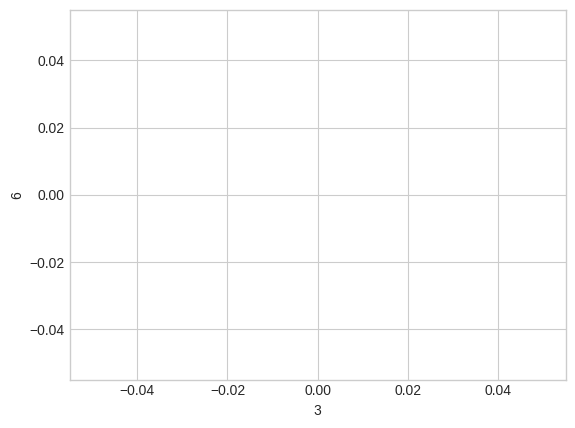

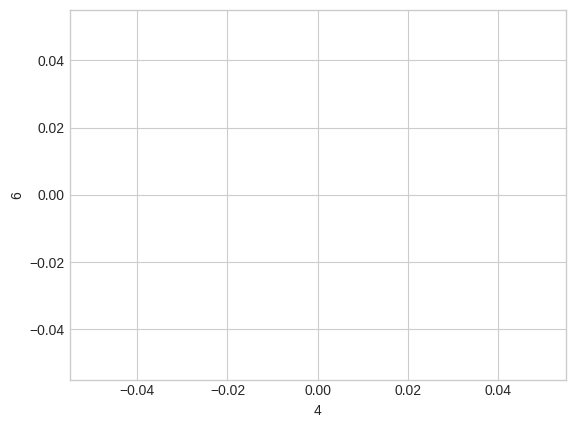

In [ ]:
# Printing out generated data with Pandas and plotting it with matplotlib (optional)
df=pd.read_csv(data_path + feynman_data,sep=" ",header=None)
print(df)

# Manually edit and run upon printing data and noting number of 'x' and 'y' variables. Aids in detection of potential noise


df.plot.scatter(x=3, y=6)
df.plot.scatter(x=4, y=6)


In [ ]:
#Running brute force test on perfect data (NOTE: Not counted in timing of symbolic regression function)
os.chdir(input_path)
!pwd
aifeynman.S_brute_force.brute_force(input_path,feynman_data,30,"19ops.txt")

In [ ]:
# Running symbolic regression function on generated dataset
os.chdir(input_path)
!pwd
start_time = time.time()
aifeynman.S_run_aifeynman.run_aifeynman(input_path,feynman_data,30,"19ops.txt", polyfit_deg=3, NN_epochs=600)
print(time.time() - start_time)

In [ ]:
# Viewing processed data
!ls -1 '/content/drive/My Drive/Symbolic-Regressor/Feynman Local/AI Feynman_v2/results'

os.chdir('/content/drive/My Drive/Symbolic-Regressor/Feynman Local/AI Feynman_v2/results/')

with open('solution_' + feynman_data, 'r') as f:
  print(f.read())